<a href="https://colab.research.google.com/github/Salesjdsj/Data_science/blob/main/Analisando_os_Dados_do_Airbnb_da_cidade_de_Nova_Iorque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Nova Iorque*
## O Airbnb

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

## A cidade de Nova Iorque

A cidade de Nova Iorque compreende 5 distritos: Bronx, Queens, Brooklyn, Staten Island e Manhattan. Esses locais estão situados no encontro do rio Hudson com o Oceano Atlântico. 

No centro da cidade fica Manhattan, um distrito com alta densidade demográfica que está entre os principais centros comerciais, financeiros e culturais do mundo. Entre seus pontos emblemáticos, destacam-se arranha-céus, como o Empire State Building, e o enorme Central Park. O teatro da Broadway fica em meio às luzes de neon da Times Square.

**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova Iorque, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York City (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/united-states/ny/new-york-city/2021-06-02/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://www.dropbox.com/s/m07qac4yhlmpdgt/listings.csv?dl=1) o conjunto que utilizamos, para que esse material seja sempre útil para você.

Com isso em mente, vamos ao projeto.

In [1]:
# Instalando a biblioteca necessária
!pip install folium

In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://www.dropbox.com/s/m07qac4yhlmpdgt/listings.csv?dl=1")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - nome do distrito
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.34,3,308
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,79,1,403,2021-05-04,5.16,1,208
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.56,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,21,1,2014-01-02,0.01,1,134
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,61,2,474,2020-09-25,3.61,1,246


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 36230 entradas e 74 variáveis (`listings.csv.gz`).

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 36230
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 26,1 % das entradas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.261054
last_review                       0.261054
host_name                         0.000718
name                              0.000386
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

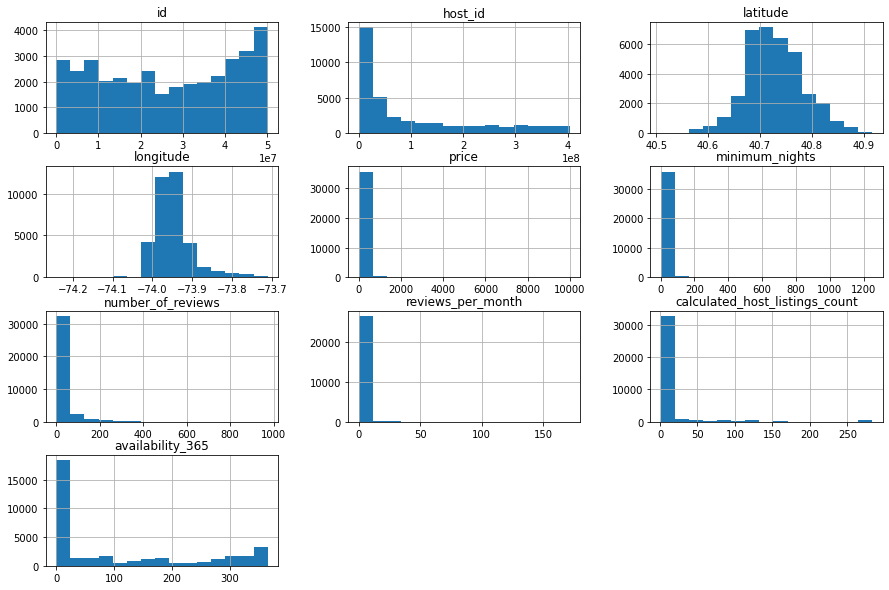

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36230.000000,36230.000000,36230.000000,26772.000000,36230.000000,36230.000000
mean,157.052332,23.092520,22.684460,1.199019,12.249738,107.233646
std,295.210421,28.145009,48.620407,3.274870,41.304267,134.738250
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,65.000000,3.000000,0.000000,0.110000,1.000000,0.000000
50%,102.000000,30.000000,4.000000,0.400000,1.000000,16.000000
75%,171.000000,30.000000,19.000000,1.340000,3.000000,219.000000
max,10000.000000,1250.000000,972.000000,171.530000,283.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 171, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.
* A variável quantidade de imóveis do mesmo anfitrião (`calculated_host_listings_count`) possui 75% dos valores até 3, porém seu valor máximo é 283.
#### Boxplot para minimum_nights

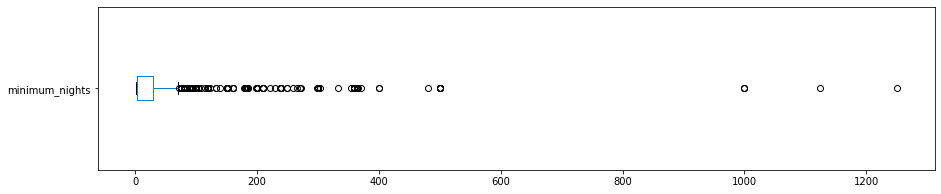

minimum_nights: valores acima de 30:
1384 entradas
3.8200%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

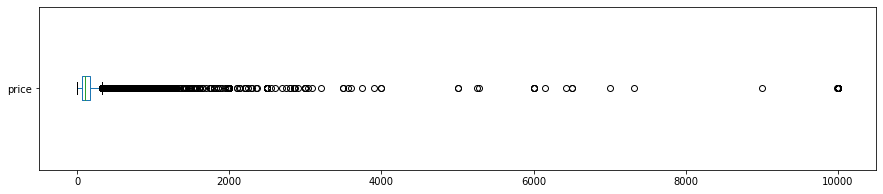


price: valores acima de 1000
291 entradas
0.8032%


In [8]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Boxplot para calculated_host_listings_count

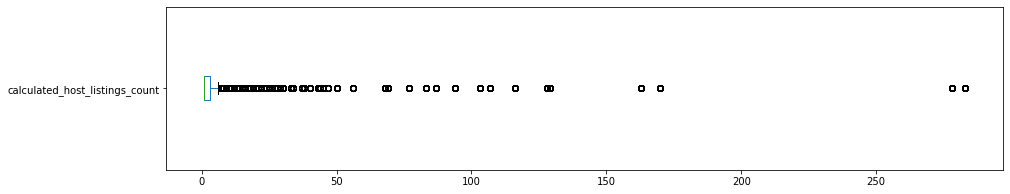


calculated_host_listings_count: valores acima de 200
561 entradas
1.5484%


In [30]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 3 para calculated_host_listings_count
print("\ncalculated_host_listings_count: valores acima de 200")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 200])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 200]) / df.shape[0])*100))

# df.calculated_host_listings_count.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

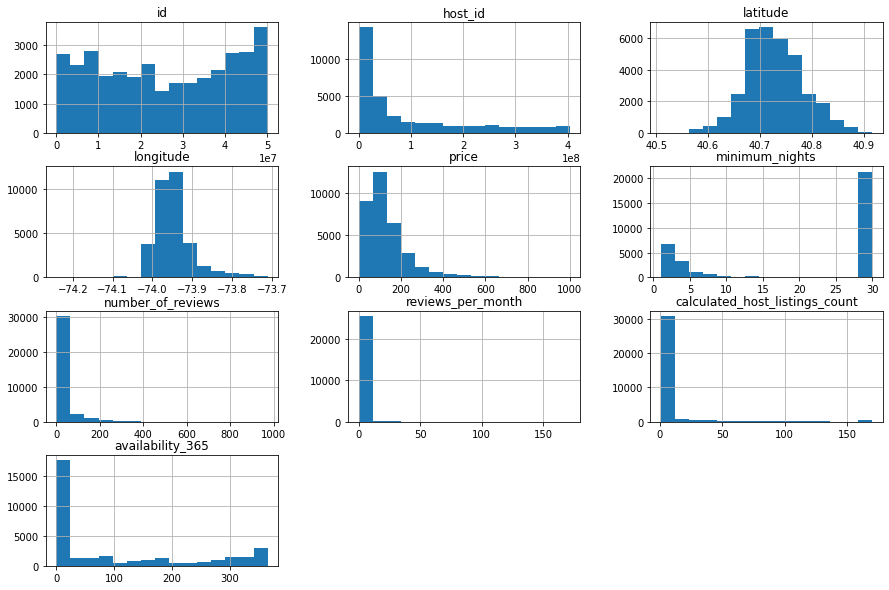

In [31]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 200].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [32]:
# Verificando a porcentagem de entradas com minimum_nights igual a 30
df_clean.loc[df_clean.minimum_nights == 30].shape[0] / df_clean.shape[0]

0.6260353639194032

In [33]:
# Quantidade de entradas por quantidade mínima de noites
df_clean.minimum_nights.value_counts()

30    21314
1      3667
2      3023
3      2341
5       913
4       880
7       687
14      263
6       237
10      157
15      114
28      111
20       78
21       53
29       42
25       35
8        29
12       27
9        22
13       18
27        7
16        6
18        5
23        3
24        3
17        3
11        3
22        2
26        2
19        1
Name: minimum_nights, dtype: int64

Olhando os dados acima, a variável `minimum_nights` possui 21314 entradas onde a quantidade mínima de noites é igual a 30. Valor bastante relevante que representa 62,6% das entradas.

### **Q5. Qual a média dos preços de aluguel?**

Vamos analisar de maneira geral a média de preços, sem considerar a localização (essa análise será realizada posteriormente).

In [34]:
# ver a média da coluna price 
df_clean.price.mean()

139.17946307936322

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [35]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.060303,-0.042685,0.003512,-0.023387,0.095253
minimum_nights,-0.060303,1.000000,-0.264750,-0.276482,0.108752,-0.163170
number_of_reviews,-0.042685,-0.264750,1.000000,0.379803,-0.095851,0.143311
reviews_per_month,0.003512,-0.276482,0.379803,1.000000,0.001146,0.122287
calculated_host_listings_count,-0.023387,0.108752,-0.095851,0.001146,1.000000,0.164182
availability_365,0.095253,-0.163170,0.143311,0.122287,0.164182,1.000000


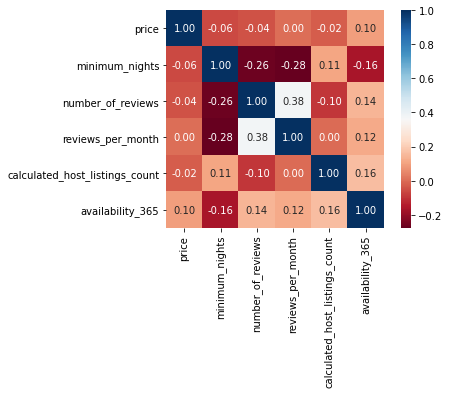

In [36]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [37]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    17794
Private room       15387
Shared room          601
Hotel room           264
Name: room_type, dtype: int64

In [38]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.522646
Private room       0.451947
Shared room        0.017653
Hotel room         0.007754
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara da cidade de Nova Iorque?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) e distritos (*neighbourhood_group*) a partir do preço de locação.

#### Analisando os bairros

In [39]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Fort Wadsworth       800.000000
Prince's Bay         397.500000
Tottenville          356.000000
Tribeca              319.689655
Willowbrook          309.000000
SoHo                 250.449153
Arverne              246.089552
Theater District     244.914163
Flatiron District    243.426230
NoHo                 241.512195
Name: price, dtype: float64

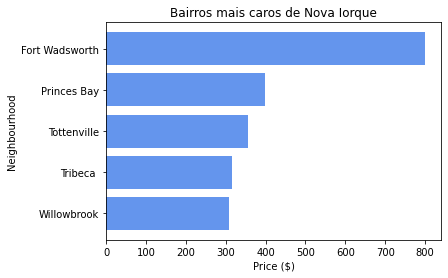

In [47]:
# Visualizando graficamente as 5 primeiras entradas
# Definindo os valores do eixo x
neighbourhood = [ 'Willowbrook','Tribeca ', 'Tottenville', 'Princes Bay',  'Fort Wadsworth']

# Definindo os valores do eixo y
price = [309, 316.16, 356, 397.5, 800]

# A Label para o eixo x
plt.xlabel('Price ($)')

# A Label para o eixo y
plt.ylabel('Neighbourhood')

# O título do gráfico
plt.title("Bairros mais caros de Nova Iorque")

# Plotando o gráfico
plt.barh(neighbourhood, price, color="#6495ED")

# Chamamos o método show() para mostrar o gráfico na tela
plt.show;

Aqui, vemos que Fort Wadsworth destoa em relação a outros bairros de Nova Iorque. vamos investigar o motivo:

In [48]:
# ver quantidade de imóveis em Fort Wadsworth
print(df_clean[df_clean.neighbourhood == "Fort Wadsworth"].shape)

# ver a entrada de Fort Wadsworth
df_clean[df_clean.neighbourhood == "Fort Wadsworth"]

(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14361,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,Fort Wadsworth,40.59324,-74.0608,Entire home/apt,800,30,0,NaN,NaN,6,365


Assim, é possível perceber que por possuir somente um imóvel, o preço médio ficou bem acima das demais localidades.

#### Analisando os distritos

In [49]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        174.035948
Brooklyn         120.233248
Staten Island    106.488136
Bronx             98.782038
Queens            96.664369
Name: price, dtype: float64

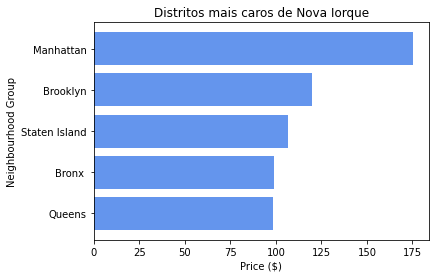

In [50]:
# Visualizando graficamente as 5 primeiras entradas
# Definindo os valores do eixo x
neighbourhood = ['Queens', 'Bronx ', 'Staten Island', 'Brooklyn', 'Manhattan']

# Definindo os valores do eixo y
price = [98.66, 98.78, 106.48, 120.04, 175.13]

# A Label para o eixo x
plt.xlabel('Price ($)')

# A Label para o eixo y
plt.ylabel('Neighbourhood Group')

# O título do gráfico
plt.title("Distritos mais caros de Nova Iorque")

# Plotando o gráfico
plt.barh(neighbourhood, price, color="#6495ED")

# Chamamos o método show() para mostrar o gráfico na tela
plt.show;

#### Localizando no mapa 
Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

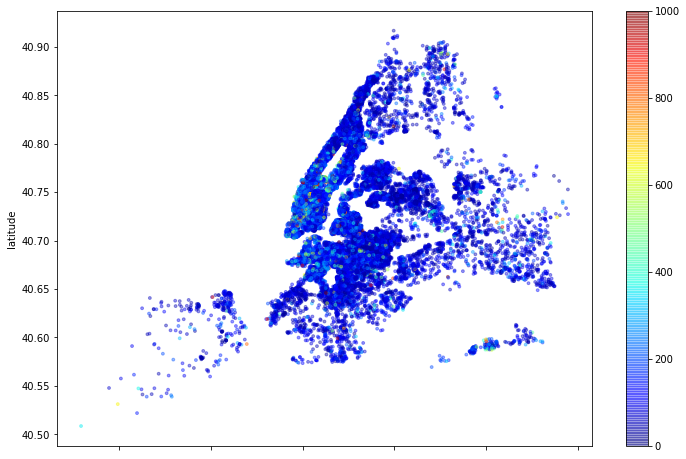

In [51]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [52]:
# Mapa de Nova Iorque
folium.Map(
    location=[40.700657,-74.054683],
    tiles='Stamen Toner', min_zoom=8, max_zoom=12
)

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Analisando a média do número mínimo de noites para aluguel obtemos o seguinte valor:

In [53]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

20.17890501086765

Uma quantidade significativa de imóveis (21870), exigem um mínimo de 30 noites. Uma possível explicação para esse fato pode ser de os anfitriões anunciarem seus imóveis buscando nova iorquinos como inquilinos fixos e não visando os turistas.

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.



Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 74 atributos disponíveis.






